In [1]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
import numpy as np
from numpy import sqrt, sin, cos, pi
from scipy.integrate import quad
import matplotlib.pyplot as plt

l = 1 # Length of pendulum (m)
g = 9.8 # Acceleration due to gravity (ms^-2)

# Define the integrands that are needed to solve the physical pendulum length

def integrand_non_sing(phi,theta_m):
    # This contains the function you need to integrate to calculate the period of the non-linear pendulum
    res = 4*np.sqrt(l/(g))/sqrt(1-sin(theta_m/2)**2*sin(phi)**2)
    return res
                 
def integrand_sing(theta,theta_m):
    # This contains the function you need to integrate to calculate the period of the non-linear pendulum
    res =  4*np.sqrt(1/(2*g))/np.sqrt(cos(theta)-cos(theta_m));
    return res
    

<function matplotlib.pyplot.show(*args, **kw)>

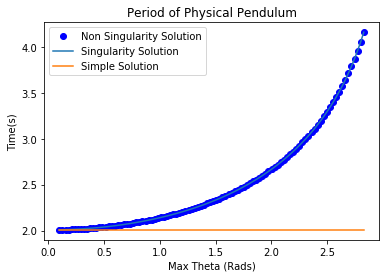

In [21]:
npoints = 100 # Number of points that needs to be solved over

# Set up zero arrays that are then filled
T_non_sing_v = np.zeros(npoints)
T_sing_v = np.zeros(npoints)
theta_m_v = np.linspace(0.1,0.9*pi,npoints)

# Solution for a simple pendulum for comparison
T_simple = 2*pi*sqrt(l/g)*np.ones(npoints)

# Now loop over all of the theta_max points and solve both integrals
for ii in range(0, (npoints) ):
    # temps are simple holding variables because quad returns [answer, error] 
    temp_ns = quad(integrand_non_sing,0,pi/2, args=(theta_m_v[ii]))
    T_non_sing_v[ii] = temp_ns[0]
    temp_s = quad(integrand_sing,0,theta_m_v[ii],args=(theta_m_v[ii]))
    T_sing_v[ii] = temp_s[0]

 # Now plot the results   
plt.plot(theta_m_v,T_non_sing_v,'bo',label = 'Non Singularity Solution')
plt.plot(theta_m_v,T_sing_v,label = 'Singularity Solution')
plt.plot(theta_m_v,T_simple, label = 'Simple Solution')
plt.xlabel('Max Theta (Rads)')
plt.ylabel('Time(s)')
plt.title('Period of Physical Pendulum')
           
plt.legend()
plt.show